# Алгоритмы интеллектуальной обработки больших объемов данных
## Домашнее задание №3: Линейные модели


###### <hr\>
**Общая информация**

**Срок сдачи:** 8 апреля 2019, 06:00 <br\>
**Штраф за опоздание:** -2 балла после 06:00 8 апреля, -4 балла после 06:00 15 апреля, -6 баллов после 06:00 22 апреля  -8 баллов после 06:00 29 апреля.

При отправлении ДЗ указывайте фамилию в названии файла<br\>

Используйте данный Ipython Notebook при оформлении домашнего задания.

**Штрафные баллы:**

1. Невыполнение PEP8 -1 балл
2. Отсутствие фамилии в имени скрипта (скрипт должен называться по аналогии со stroykova_hw2.ipynb) -1 балл
3. Все строчки должны быть выполнены. Нужно, чтобы output команды можно было увидеть уже в git'е. В противном случае -1 балл
4. При оформлении ДЗ нужно пользоваться данным файлом в качестве шаблона. Не нужно удалять и видоизменять написанный код и текст, если явно не указана такая возможность. В противном случае -1 балл
<hr\>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)

Здравствуйте, уважаемые студенты! 

В этом задании мы будем реализовать линейные модели. Необходимо реализовать линейную и логистическую регрессии с L2 регуляризацией

# Теоретическое введение



*** Что почитать по теории ***

Одна из лучших книг по ML $-$ "Pattern Recognition and Machine Learning" Bishop, Christopher. 

Линейная регрессия решает задачу регрессии и оптимизирует функцию потерь MSE 

$$L(w) =  \frac{1}{N}\left[\sum_i (y_i - a_i) ^ 2 \right], $$ где $y_i$ $-$ целевая функция,  $a_i = a(x_i) =  \langle\,x_i,w\rangle ,$ $-$ предсказание алгоритма на объекте $x_i$, $w$ $-$ вектор весов (размерности $D$), $x_i$ $-$ вектор признаков (такой же размерности $D$).


Логистическая регрессия является линейным классификатором, который оптимизирует так называемый функционал log loss:

$$L(w) = - \frac{1}{N}\left[\sum_i y_i \log a_i + ( 1 - y_i) \log (1 - a_i) \right],$$
где  $y_i  \in \{0,1\}$ $-$ метка класса, $a_i$ $-$ предсказание алгоритма на объекте $x_i$. Модель пытается предсказать апостериорую вероятность объекта принадлежать к классу "1":
$$ p(y_i = 1 | x_i) = a(x_i) =  \sigma( \langle\,x_i,w\rangle ),$$
$w$ $-$ вектор весов (размерности $D$), $x_i$ $-$ вектор признаков (такой же размерности $D$).

Функция $\sigma(x)$ $-$ нелинейная функция, пероводящее скалярное произведение объекта на веса в число $\in (0,1)$ (мы же моделируем вероятность все-таки!)

$$\sigma(x) = \frac{1}{1 + \exp(-x)}$$

Если внимательно посмотреть на функцию потерь, то можно заметить, что в зависимости от правильного ответа алгоритм штрафуется или функцией $-\log a_i$, или функцией $-\log (1 - a_i)$.



Часто для решения проблем, которые так или иначе связаны с проблемой переобучения, в функционал качества добавляют слагаемое, которое называют ***регуляризацией***. Итоговый функционал для линейной регрессии тогда принимает вид:

$$L(w) =  \frac{1}{N}\left[\sum_i (y_i - a_i) ^ 2 \right] + \frac{1}{C}R(w) $$

Для логистической: 
$$L(w) = - \frac{1}{N}\left[\sum_i y_i \log a_i + ( 1 - y_i) \log (1 - a_i) \right] +  \frac{1}{C}R(w)$$

Самое понятие регуляризации введено основателем ВМК академиком Тихоновым https://ru.wikipedia.org/wiki/Метод_регуляризации_Тихонова

Идейно методика регуляризации заключается в следующем $-$ мы рассматриваем некорректно поставленную задачу (что это такое можно найти в интернете), для того чтобы сузить набор различных вариантов (лучшие из которых будут являться переобучением ) мы вводим дополнительные ограничения на множество искомых решений. На лекции Вы уже рассмотрели два варианта регуляризации.

$L1$ регуляризация:
$$R(w) = \sum_{j=1}^{D}|w_j|$$
$L2$ регуляризация:
$$R(w) =  \sum_{j=1}^{D}w_j^2$$

С их помощью мы ограничиваем модель в  возможности выбора каких угодно весов минимизирующих наш лосс, модель уже не сможет подстроиться под данные как ей угодно. 

Вам нужно добавить соотвествущую Вашему варианту $L2$ регуляризацию.

И так, мы поняли, какую функцию ошибки будем минимизировать, разобрались, как получить предсказания по объекту и обученным весам. Осталось разобраться, как получить оптимальные веса. Для этого нужно выбрать какой-то метод оптимизации.



Градиентный спуск является самым популярным алгоритмом обучения линейных моделей. В этом задании Вам предложат реализовать стохастический градиентный спуск или  мини-батч градиентный спуск (мини-батч на русский язык довольно сложно перевести, многие переводят это как "пакетный", но мне не кажется этот перевод удачным). Далее нам потребуется определение **эпохи**.
Эпохой в SGD и MB-GD называется один проход по **всем** объектам в обучающей выборки.
* В SGD градиент расчитывается по одному случайному объекту. Сам алгоритм выглядит примерно так:
        1) Перемешать выборку
        2) Посчитать градиент функции потерь на одном объекте (далее один объект тоже будем называть батчем)
        3) Сделать шаг спуска
        4) Повторять 2) и 3) пока не пройдет максимальное число эпох.
* В Mini Batch SGD - по подвыборке объектов. Сам алгоритм выглядит примерно так::
        1) Перемешать выборку, выбрать размер мини-батча (от 1 до размера выборки)
        2) Почитать градиент функции потерь по мини-батчу (не забыть поделить на  число объектов в мини-батче)
        3) Сделать шаг спуска
        4) Повторять 2) и 3) пока не пройдет максимальное число эпох.
* Для отладки алгоритма реализуйте возможность  вывода средней ошибки на обучении модели по объектам (мини-батчам). После шага градиентного спуска посчитайте значение ошибки на объекте (или мини-батче), а затем усредните, например, по ста шагам. Если обучение проходит корректно, то мы должны увидеть, что каждые 100 шагов функция потерь уменьшается. 
* Правило останова - максимальное количество эпох
    


# Теоретические вопросы (2 балла)
В этой части Вам будут предложены теоретичские вопросы и задачи по теме. Вы, конечно, можете списать их у своего товарища или найти решение в интернете, но учтите, что они обязательно войдут в теоретический коллоквиум. Лучше разобраться в теме сейчас и успешно ответить на коллоквиуме, чем списать, не разобравшись в материале, и быть терзаемым совестью. 


Формулы надо оформлять в формате **LaTeX**.

Задача 1. Градиент для линейной регрессии.
* Выпишите формулу обновления весов для линейной регрессии с L2 регуляризацией для мини-батч градиентого спуска размера $n$:

$$ w_{new} = w_{old} - ... $$

 Отнеситесь к этому пункту максимально серьезно, это Вам нужно будет реализовать в задании.
 
Проанализруйте итоговую формулу градиента - как  интуитивно можно  описать, чему равен градиент?

$$ w_{new} = w_{old} - \frac{\alpha}{n} \sum_{i=1}^n \left[ x_i (x_i*w_{old} - y) + \frac{1}{C} w_{old} \right] $$

По сути это вектор признаков объекта умноженный на ошибку на нем.

Задача 2. Градиент для логистической регрессии.
* Выпишите формулу обновления весов для логистической регрессии с L2 регуляризацией  для мини-батч градиентого спуска размера $n$:

$$ w_{new} = w_{old} - ...$$

 Отнеситесь к этому пункту максимально серьезно, это Вам нужно будет реализовать в задании.
 
Проанализруйте итоговую формулу градиента - как  интуитивно можно  описать, чему равен градиент? Как соотносится этот градиент с градиентом, возникающий в задаче линейной регрессии?

$$ w_{new} = w_{old} - \frac{\alpha}{n} \sum_{i=1}^n \left[x_i(x_i*w_{old}-y)+\frac{1}{C}w_{old} \right]$$

По сути это вектор признаков объекта умноженный на ошибку на нем.
Выглядит точно так же, как и в линейной регрессии, но результат перемножения вектора признаков и вектора весов разный.

Задача 3. Точное решение линейной регрессии

На лекции было показано, что точное решение линейной регрессии имеет вид $w = (X^TX)^{-1}X^TY $. 
* Покажите, что это действительно является точкой минимума в случае, если матрица X имеет строк не меньше, чем столбцов и имеет полный ранг. Подсказка: посчитайте Гессиан и покажите, что в этом случае он положительно определен. 
* Выпишите точное решение для модели с $L2$ регуляризацией
$$w = (X^TX+\alpha I)^{-1}X^TY $$

$$ \nabla_w Q = X^T X w - X^T y$$
$$ \Delta_w Q = X^T X $$
$ \Delta_w Q $ — положительно определена по критерию

Задача 4.  Предсказываем вероятности.

Когда говорят о логистической регрессии, произносят фразу, что она "предсказывает вероятности положительного класса". Давайте разберемся, что же за этим стоит. Посчитаем математическое ожидание функции потерь и проверим, что предсказание алгоритма, оптимизирующее это мат. ожидание, будет являться вероятностью положительного класса. 

И так, функция потерь на объекте $x_i$, который имеет метку $y_i \in \{0,1\}$  для предсказания $a(x_i)$ равна:
$$L(y_i, b) =-[y_i == 1] \log a(x_i)  - [y_i == 0] \log(1 - a(x_i)) $$

Где $[]$ означает индикатор $-$ он равен единице, если значение внутри него истинно, иначе он равен нулю. Тогда мат. ожидание при условии конкретного $x_i$  по определение мат. ожидания дискретной случайной величины:
$$E(L | x_i) = -p(y_i = 1 |x_i ) \log a(x_i)  - p(y_i = 0 | x_i) \log( 1 - a(x_i))$$
* Докажите, что значение $a(x_i)$, минимизирующее данное мат. ожидание, в точности равно $p(y_i = 1 |x_i)$, то есть равно вероятности положительного класса.

Подсказка: возможно, придется воспользоваться, что  $p(y_i = 1 | x_i) + p(y_i = 0 | x_i) = 1$

$$ \frac{d E(L | x_i)}{d a(x_i)} = - \frac{p(y_i = 1 |x_i )}{a(x_i)}  + \frac{p(y_i = 0 | x_i)}{ 1 - a(x_i)} = 0$$
$$ a(x_i) p(y_i = 0 | x_i) = p(y_i = 1 |x_i ) ( 1 - a(x_i))$$
$$ a(x_i) (1-p(y_i = 1 | x_i)) = p(y_i = 1 |x_i ) ( 1 - a(x_i))$$
$$ a(x_i) = p(y_i = 1 |x_i )$$

#  Реализация линейной модели (5 баллов)

## Зачем нужны батчи?


Как Вы могли заметить из теоретического введения, что в случае SGD, что в случа mini-batch GD,  на каждой итерации обновление весов  происходит только по небольшой части данных (1 пример в случае SGD, batch примеров в случае mini-batch). То есть для каждой итерации нам *** не нужна вся выборка***. Мы можем просто итерироваться по выборке, беря батч нужного размера (далее 1 объект тоже будем называть батчом).

Легко заметить, что в этом случае нам не нужно загружать все данные в оперативную память, достаточно просто считать батч с диска, обновить веса, считать диска другой батч и так далее. В целях упрощения домашней работы, прямо с диска  мы считывать не будем, будем работать с обычными numpy array. 





## Немножко про генераторы в Python



Идея считывания данных кусками удачно ложится на так называемые ***генераторы*** из языка Python. В данной работе Вам предлагается не только разобраться с логистической регрессией, но  и познакомиться с таким важным элементом языка.  При желании Вы можете убрать весь код, связанный с генераторами, и реализовать логистическую регрессию и без них, ***штрафоваться это никак не будет***. Главное, чтобы сама модель была реализована правильно, и все пункты были выполнены. 

Подробнее можно почитать вот тут https://anandology.com/python-practice-book/iterators.html


К генератору стоит относиться просто как к функции, которая порождает не один объект, а целую последовательность объектов. Новое значение из последовательности генерируется с помощью ключевого слова ***yield***. Ниже Вы можете насладиться  генератором чисел Фибоначчи.

In [2]:
def fib(max_iter=4):
    a, b = 0, 1
    iter_num = 0
    while 1:
        yield a
        a, b = b, a + b
        iter_num += 1
        if iter_num == max_iter:
            break

Вот так можно сгенерировать последовательность Фибоначчи. 

Заметьте, что к генераторам можно применять некоторые стандартные функции из Python, например enumerate.

In [3]:
new_generator = fib()
for j, fib_val in enumerate(new_generator):
    print ("Fib num: " + str(j) + " fib values: " + str(fib_val))

Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2


Пересоздавая объект, можно сколько угодно раз генерировать заново последовательность. 

In [4]:
for i in range(0, 3):
    new_generator = fib()
    for j, fib_val in enumerate(new_generator):
        print ("Fib num: " + str(j) + " fib values: " + str(fib_val))

Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2
Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2
Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2


А вот так уже нельзя.

In [5]:
new_generator = fib()
for i in range(0, 3):
    for j, fib_val in enumerate(new_generator):
        print ("Fib num: " + str(j) + " fib values: " + str(fib_val))

Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2


Концепция крайне удобная для обучения  моделей $-$ у Вас есть некий источник данных, который Вам выдает их кусками, и Вам совершенно все равно откуда он их берет. Под ним может скрывать как массив в оперативной памяти, как файл на жестком диске, так и SQL база данных. Вы сами данные никуда не сохраняете, оперативную память экономите.

Если Вам понравилась идея с генераторами, то Вы можете реализовать свой, используя прототип batch_generator. В нем Вам нужно выдавать батчи признаков и ответов для каждой новой итерации спуска. Если не понравилась идея, то можете реализовывать SGD или mini-batch GD без генераторов.

In [6]:
def batch_generator(X, y, shuffle=True, batch_size=1):
    """
    Гератор новых батчей для обучения
    X          - матрица объекты-признаки
    y_batch    - вектор ответов
    shuffle    - нужно ли случайно перемешивать выборку
    batch_size - размер батча ( 1 это SGD, > 1 mini-batch GD)
    Генерирует подвыборку для итерации спуска (X_batch, y_batch)
    """
    n = X.shape[0]
    assert n == y.shape[0]
    
    indicies = np.arange(len(X))
    #print(indicies)

    if shuffle:
        np.random.shuffle(indicies)
        #print(indicies)
        
    for i in range(0,n,batch_size):
        X_batch = X[indicies[i:min(n,i+batch_size)]]
        #print(X_batch.shape)
        y_batch = y[indicies[i:min(n,i+batch_size)]]
        yield (X_batch, y_batch)

In [8]:
%load_ext pycodestyle_magic


In [7]:
#%%pycodestyle
from sklearn.base import BaseEstimator, ClassifierMixin


def sigmoid(x):
    """
    Вычисляем значение сигмоида.
    X - выход линейной модели
    """
    sigm_value_x = 1 / (1 + np.exp(-x))
    return sigm_value_x


class MySGDClassifier(BaseEstimator, ClassifierMixin):

    def __init__(self, batch_generator, C=1, alpha=0.01, max_epoch=10,
                 model_type='lin_reg', batch_size=1):
        """
        batch_generator -- функция генератор, которой будем создавать батчи
        C - коэф. регуляризации
        alpha - скорость спуска
        max_epoch - максимальное количество эпох
        model_type - тим модели, lin_reg или log_reg
        """

        self.C = C
        self.alpha = alpha
        self.max_epoch = max_epoch
        self.batch_generator = batch_generator
        self.errors_log = {'iter': [], 'loss': []}
        self.model_type = model_type
        self.batch_size = batch_size

    def calc_loss(self, X_batch, y_batch):
        """
        Считаем функцию потерь по батчу
        X_batch - матрица объекты-признаки по батчу
        y_batch - вектор ответов по батчу
        Не забудте тип модели (линейная или логистическая регрессия)!
        """
        predicted = self.predict(X_batch)

        if self.model_type == 'lin_reg':
            loss = (1 / X_batch.shape[0]) * np.sum((predicted - y_batch) ** 2)
        if self.model_type == 'log_reg':
            a = sigmoid(np.dot(X_batch, self.weights))

            # print(a)
            # print(y_batch)
            # print(X_batch)
            loss = -(1 / X_batch.shape[0]) * \
                np.sum(y_batch * np.log2(a) +
                       (1 - y_batch) * np.log2(1 - a))

        R = np.linalg.norm(self.weights) / self.C
        return loss + R

    def calc_loss_grad(self, X_batch, y_batch):
        """
        Считаем  градиент функции потерь по батчу
        (то что Вы вывели в задании 1)
        X_batch - матрица объекты-признаки по батчу
        y_batch - вектор ответов по батчу
        Не забудте тип модели (линейная или логистическая регрессия)!
        """
        N = X_batch.shape[0]

        if self.model_type == 'lin_reg':
            # print(np.dot((self.predict(X_batch)-y_batch),X_batch))
            loss_grad = (1 / N) * np.dot((self.predict(X_batch) - y_batch),
                                         X_batch) + (2 / self.C) * self.weights
            # print(loss_grad)
        if self.model_type == 'log_reg':
            a = sigmoid(np.dot(X_batch, self.weights))
            loss_grad = (1 / N) * np.dot((a - y_batch), X_batch) + \
                        (2 / self.C) * self.weights

        return loss_grad

    def update_weights(self, new_grad):
        """
        Обновляем вектор весов
        new_grad - градиент по батчу
        """
        # print(new_grad)
        self.weights -= self.alpha * new_grad

    def fit(self, X, y):
        '''
        Обучение модели
        X - матрица объекты-признаки
        y - вектор ответов
        '''

        # Нужно инициализровать случайно веса
        X = np.hstack((np.ones((X.shape[0], 1)), X))
        self.weights = np.random.uniform(0, 1, X.shape[1])

        if self.model_type == 'lin_reg':
            y[y == 0] = -1

        # print(X.shape)
        for n in range(0, self.max_epoch):
            new_epoch_generator = \
                self.batch_generator(X, y,
                                     shuffle=True, batch_size=self.batch_size)
            for batch_num, new_batch in enumerate(new_epoch_generator):
                X_batch = new_batch[0]
                y_batch = new_batch[1]
                batch_grad = self.calc_loss_grad(X_batch, y_batch)
                self.update_weights(batch_grad)
                batch_loss = self.calc_loss(X_batch, y_batch)

                self.errors_log['iter'].append(batch_num)
                self.errors_log['loss'].append(batch_loss)

        return self

    def predict(self, X):
        '''
        Предсказание класса
        X - матрица объекты-признаки
        Не забудте тип модели (линейная или логистическая регрессия)!
        '''

        # Желательно здесь использовать матричные операции между X и
        # весами, например, numpy.dot
        # print(X.shape)

        if self.model_type == 'lin_reg':
            y_hat = np.dot(X, self.weights)
            return y_hat

        if self.model_type == 'log_reg':
            y_hat = np.dot(X, self.weights)
            return (y_hat >= 0.5).astype(int)

Запустите обе регрессии на синтетических данных. 


Выведите полученные веса и нарисуйте разделяющую границу между классами (используйте только первых два веса для первых двух признаков X[:,0], X[:,1] для отображения в 2d пространство ).  

In [9]:
def plot_decision_boundary(clf):
    w = clf.weights
    print(w)
    x = np.linspace(-2, 6)
    plt.plot(x, -(w[0] + w[1]*x) / w[2])

[-1.94238516  0.59053994 -0.39528527]
[-1.16271183  0.20616172 -0.32044317]


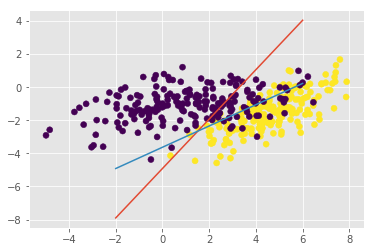

In [10]:
np.random.seed(0)

C1 = np.array([[0., -0.8], [1.5, 0.8]])
C2 = np.array([[1., -0.7], [2., 0.7]])
gauss1 = np.dot(np.random.randn(200, 2) + np.array([5, 3]), C1)
gauss2 = np.dot(np.random.randn(200, 2) + np.array([1.5, 0]), C2)

X = np.vstack([gauss1, gauss2])
y = np.r_[np.ones(200), np.zeros(200)]


log_clf = MySGDClassifier(batch_generator, model_type = 'log_reg',C=100)
log_clf.fit(X,y)
plot_decision_boundary(log_clf)

lin_clf = MySGDClassifier(batch_generator, model_type = 'lin_reg',C=100)
lin_clf.fit(X,y)
plot_decision_boundary(lin_clf)


plt.scatter(X[:,0], X[:,1], c=y)

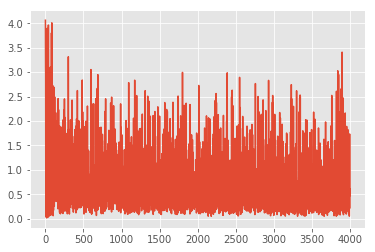

In [11]:
plt.plot(log_clf.errors_log['loss'])

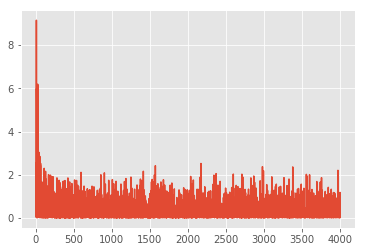

In [12]:
plt.plot(lin_clf.errors_log['loss'])

Далее будем анализировать Ваш алгоритм. 
Для этих заданий используйте датасет ниже.

In [13]:
from sklearn.datasets import make_classification

In [14]:
X, y = make_classification(n_samples=100000, n_features=10, 
                           n_informative=4, n_redundant=0, 
                           random_state=123, class_sep=1.0,
                           n_clusters_per_class=1)

Покажите сходимости обеих регрессией на этом датасете: изобразите график  функции потерь, усредненной по $N$ шагам градиентого спуска, для разных `alpha` (размеров шага). Разные `alpha` расположите на одном графике. 

$N$ можно брать 10, 50, 100 и т.д. 

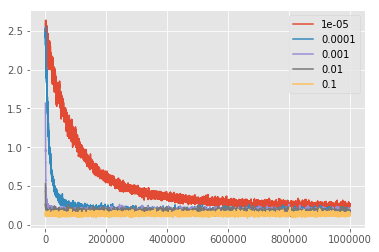

In [15]:
def moving_average(data_set, periods):
    weights = np.ones(periods) / periods
    return np.convolve(data_set, weights, mode='valid')


alphas = [0.00001,0.0001,0.001,0.01,0.1]
losses = []

for alpha in alphas:
    my_clf = MySGDClassifier(batch_generator, model_type = 'log_reg', alpha=alpha, C=100)
    my_clf.fit(X,y)
    plt.plot(moving_average(my_clf.errors_log['loss'],500),label=alpha)
plt.legend()

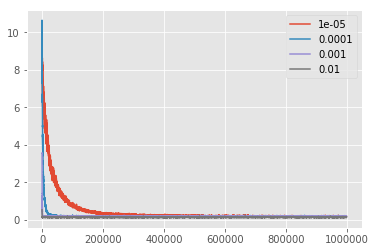

In [19]:
alphas = [0.00001,0.0001,0.001,0.01]

for alpha in alphas:
    my_clf = MySGDClassifier(batch_generator, model_type = 'lin_reg', alpha=alpha, C=100)
    my_clf.fit(X,y)
    plt.plot(moving_average(my_clf.errors_log['loss'],500),label=alpha)
plt.legend()

Что Вы можете сказать про сходимость метода при различных `alpha`? Какое значение стоит выбирать для лучшей сходимости?

При меньших альфа сходится медленнее

Изобразите график среднего значения весов для обеих регрессий в зависимости от коеф. регуляризации С из `np.logspace(3, -3, 10)` 

/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:53: RuntimeWarning: divide by zero encountered in log2
/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:53: RuntimeWarning: invalid value encountered in multiply
/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:52: RuntimeWarning: divide by zero encountered in log2
/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:56: RuntimeWarning: invalid value encountered in double_scalars
/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:76: RuntimeWarning: overflow encountered in multiply
No handles with labels found to put in legend.


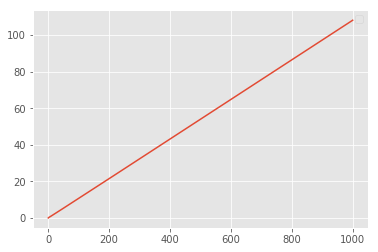

In [21]:
C = np.logspace(3, -3, 10)
weights = []

for c in C:
    my_clf = MySGDClassifier(batch_generator, model_type = 'log_reg', C=c)
    my_clf.fit(X,y)
    weights.append(np.mean(np.abs(my_clf.weights)))
    
plt.plot(C,weights)
plt.legend()

/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:44: RuntimeWarning: overflow encountered in square
/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:71: RuntimeWarning: overflow encountered in multiply
/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:71: RuntimeWarning: invalid value encountered in add
/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:86: RuntimeWarning: invalid value encountered in subtract
No handles with labels found to put in legend.


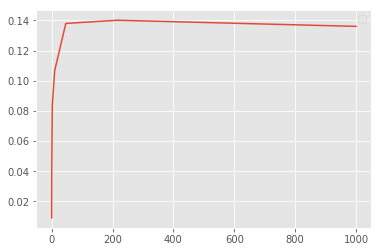

In [23]:
C = np.logspace(3, -3, 10)
weights = []

for c in C:
    my_clf = MySGDClassifier(batch_generator, model_type = 'lin_reg', C=c)
    my_clf.fit(X,y)
    weights.append(np.mean(np.abs(my_clf.weights)))
    
plt.plot(C,weights)
plt.legend()

Довольны ли Вы, насколько сильно уменьшились Ваши веса? 

Вроде да

# Боевое применение (3  балла)

Давайте применим модель на итоговом проекте! Датасет сделаем точно таким же образом, как было показано в project_overview-2.ipynb

Применим обе регрессии, подберем для них параметры и сравним качество. Может быть Вы еще одновременно с решением домашней работы подрастете на лидерборде!

In [24]:
doc_to_title = {}
with open('anomaly-detection-competition-ml1-ts-spring-2019-2/docs_titles.tsv') as f:
    for num_line, line in enumerate(f):
        if num_line == 0:
            continue
        data = line.strip().split('\t', 1)
        doc_id = int(data[0])
        if len(data) == 1:
            title = ''
        else:
            title = data[1]
        doc_to_title[doc_id] = title
print (len(doc_to_title))


28026


In [25]:
import pandas as pd
train_data = pd.read_csv('anomaly-detection-competition-ml1-ts-spring-2019-2/train_groups.csv')
traingroups_titledata = {}
for i in range(len(train_data)):
    new_doc = train_data.iloc[i]
    doc_group = new_doc['group_id']
    doc_id = new_doc['doc_id']
    target = new_doc['target']
    title = doc_to_title[doc_id]
    if doc_group not in traingroups_titledata:
        traingroups_titledata[doc_group] = []
    traingroups_titledata[doc_group].append((doc_id, title, target))

In [26]:
import numpy as np
y_train = []
X_train = []
groups_train = []

for new_group in traingroups_titledata:
    docs = traingroups_titledata[new_group]
    for k, (doc_id, title, target_id) in enumerate(docs):
        y_train.append(target_id)
        groups_train.append(new_group)
        all_dist = []
        words = set(title.strip().split())
        for j in range(0, len(docs)):
            if k == j:
                continue
            doc_id_j, title_j, target_j = docs[j]
            words_j = set(title_j.strip().split())
            all_dist.append(len(words.intersection(words_j)))
        X_train.append(sorted(all_dist, reverse=True)[0:15]    )
X_train = np.array(X_train)
y_train = np.array(y_train)
groups_train = np.array(groups_train)
print (X_train.shape, y_train.shape, groups_train.shape)

(11690, 15) (11690,) (11690,)


Подберите размер батча для обучения. Линейная модель не должна учиться дольше нескольких минут. 

Не забывайте использовать скейлер!

In [27]:
from sklearn.metrics import f1_score, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

In [28]:
scaler = StandardScaler()
X_t = scaler.fit_transform(X_train)

/miniconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/miniconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


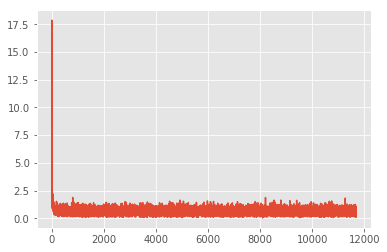

In [29]:
lin_clf = MySGDClassifier(batch_generator, model_type = 'lin_reg',max_epoch = 10, C=100, batch_size = 10)
lin_clf.fit(X_t,y_train)
plt.plot(lin_clf.errors_log['loss'])

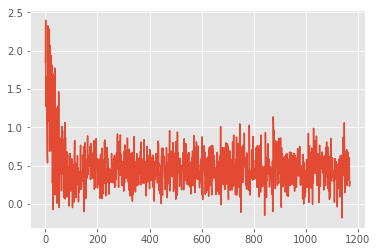

In [30]:
log_clf = MySGDClassifier(batch_generator, model_type = 'log_reg', max_epoch = 10, C=1, batch_size = 100)
log_clf.fit(X_t,y_train)
plt.plot(log_clf.errors_log['loss'])

Разбейте данные на обучение и валидацию. Подберите параметры C, alpha, max_epoch, model_type на валидации (Вы же помните, как правильно в этой задаче делать валидацию?)

In [31]:
test_labels = np.random.choice(np.unique(groups_train), 30, replace = False)
X_test_s = X_t[[i in test_labels for i in groups_train]]
y_test_s = y_train[[i in test_labels for i in groups_train]]
X_test_s = np.hstack((np.ones((X_test_s.shape[0], 1)), X_test_s))

X_train_s = X_t[[i not in test_labels for i in groups_train]]
y_train_s = y_train[[i not in test_labels for i in groups_train]]

In [47]:
alphas = np.array([0.00001,0.0001,0.001,0.01,0.1])
cs = np.array([0.1,1,10,100,1000])

result = np.zeros((alphas.shape[0],cs.shape[0]))
for alpha in range(len(alphas)):
    for c in range(len(cs)):
        my_clf = MySGDClassifier(batch_generator, model_type = 'log_reg', alpha=alphas[alpha], max_epoch=100,C=cs[c], batch_size = 100)
        my_clf.fit(X_train_s,y_train_s)

        result[alpha,c] = f1_score(y_test_s,my_clf.predict(X_test_s),average='micro')

/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:53: RuntimeWarning: divide by zero encountered in log2
/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:53: RuntimeWarning: invalid value encountered in multiply
/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:52: RuntimeWarning: divide by zero encountered in log2
/miniconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


Text(0.5, 1.0, 'Alpha-values vs. C-values')

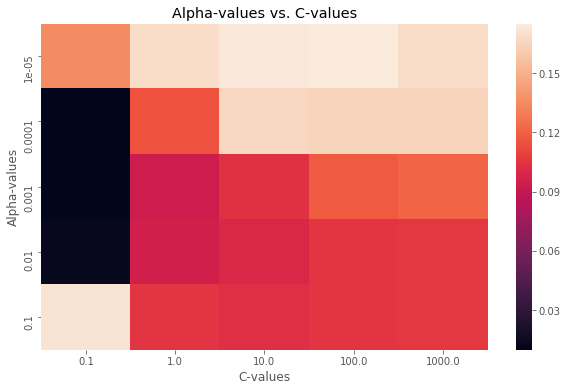

In [48]:
import seaborn as sns
fig, ax = plt.subplots(1, 1, figsize = (10, 6))
sns.heatmap(pd.DataFrame(result,alphas,cs))
ax.set_ylabel('Alpha-values')    
ax.set_xlabel('C-values')
ax.set_title('Alpha-values vs. C-values')

In [49]:
alphas = np.array([0.0001,0.001,0.01])
cs = np.array([0.01, 0.1,1,10,100,1000])

result = np.zeros((alphas.shape[0],cs.shape[0]))
for alpha in range(len(alphas)):
    for c in range(len(cs)):
        my_clf = MySGDClassifier(batch_generator, model_type = 'lin_reg', alpha=alphas[alpha], max_epoch=100,C=cs[c], batch_size = 10)
        my_clf.fit(X_train_s,y_train_s)

        try:
            result[alpha,c] = mean_squared_error(y_test_s,my_clf.predict(X_test_s))
        except:
            pass

/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:44: RuntimeWarning: overflow encountered in square
/miniconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:71: RuntimeWarning: overflow encountered in multiply
/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:71: RuntimeWarning: overflow encountered in add


Text(0.5, 1.0, 'Alpha-values vs. C-values')

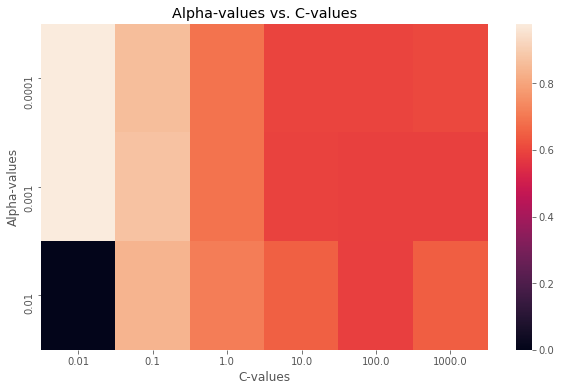

In [50]:
fig, ax = plt.subplots(1, 1, figsize = (10, 6))
sns.heatmap(pd.DataFrame(result,alphas,cs))
ax.set_ylabel('Alpha-values')    
ax.set_xlabel('C-values')
ax.set_title('Alpha-values vs. C-values')

С лучшими параметрами на валидации сделайте предсказание на тестовом множестве, отправьте его на проверку на платформу kaggle. Убедитесь, что Вы смогли побить public score первого бейзлайна. Если да, то Вы молодец!

In [51]:
import pandas as pd
test_data = pd.read_csv('anomaly-detection-competition-ml1-ts-spring-2019-2/test_groups.csv')
testingroups_titledata = {}
for i in range(len(test_data)):
    new_doc = test_data.iloc[i]
    doc_group = new_doc['group_id']
    doc_id = new_doc['doc_id']
    
    pair_id = new_doc['pair_id']
    
    title = doc_to_title[doc_id]
    if doc_group not in testingroups_titledata:
        testingroups_titledata[doc_group] = []
    testingroups_titledata[doc_group].append((doc_id, title, pair_id))

In [52]:
import numpy as np
X_testing = []
groups_test = []
ids_test = []

for new_group in testingroups_titledata:
    docs = testingroups_titledata[new_group]
    for k, (doc_id, title, pair_id) in enumerate(docs):
        groups_test.append(new_group)
        ids_test.append(pair_id)
        all_dist = []
        words = set(title.strip().split())
        for j in range(0, len(docs)):
            if k == j:
                continue
            doc_id_j, title_j, pair_id = docs[j]
            words_j = set(title_j.strip().split())
            all_dist.append(len(words.intersection(words_j)))
        X_testing.append(sorted(all_dist, reverse=True)[0:15]    )
X_testing = scaler.transform(np.array(X_testing))
groups_test = np.array(groups_test)
X_testing = np.hstack((np.ones((X_testing.shape[0], 1)), X_testing))
print (X_testing.shape, groups_test.shape)

(16627, 16) (16627,)


/miniconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [81]:
my_clf = MySGDClassifier(batch_generator, model_type = 'log_reg', alpha=0.00001, max_epoch=100,C=100, batch_size = 100)
my_clf.fit(X_t,y_train)

MySGDClassifier(C=100, alpha=1e-05,
        batch_generator=<function batch_generator at 0x115c77ae8>,
        batch_size=100, max_epoch=100, model_type='log_reg')

In [82]:
f1_score(y_train,my_clf.predict(np.hstack((np.ones((X_t.shape[0], 1)), X_t))),average='micro')

0.19452523524379808

In [83]:
predicted = my_clf.predict(X_testing)

In [84]:
df = pd.DataFrame()
df['pair_id'] = ids_test
df['target'] = predicted

In [85]:
df.to_csv('submission-test.csv',index=False)

# Контрольные вопросы
Постарайтесь максимально развернуто и честно ответить на вопросы. Они охватывают тему линейных моделей и скорее нужны преподавателям, чтобы понимать, что именно Вы усвоили плохо. Надеюсь, они подскажут, что именно в теме Вы не понимаете или наоборот порадают, что Вы все знаете ^_^

* Опишите основные, на Ваш взгляд,  отличия логистической регрессии от линейной регрессии. Почему, на ваш взгляд, задачу классификации решают логистической, а не линейной регрессией?

Логистическая регрессия по сути дает веростности — значения в промежутке [0,1], в то время, как значение целевой переменной в линейной регрессии может быть любым. Более того, логистическая регрессия в итоге сводится к задаче классификации на основании данных о вероятностях.

* Как Вы думаете, для каких типов задач (объем данных, число признаков, типы признаков) стоит отдавать предпочтение линейным моделям?

Большие объемы данных и признаков. Типы признаков — количественные, с категориальными работать уже сложнее.

* Пусть на обучении мы имеем выборку размера $N$, число признаков $D$. Чему равна алгоритмическая сложность одного шага градиентного спуска? Cтохастического градиентного спуска?  Сложность предсказания на одном объекте?

$$ GD = O(ND) $$
$$ SGD = O(D) $$
$$ prediction = O(D) $$

* В чем преимущества стохастического градиентного спуска (в том числе мини-батч) над обычным градиентным спуском? В чем его недостатки? Рассмотрите несколько аспектов $-$ скорость сходимости, необходимость загрузки всех данных в оперативную память, сложность вычисления одного шага.

Скорость сходимости меньше, так как используется не вся выборка, но при этом не нужно загружать все данные, а одна итерация считается гораздо быстрее. В итоге суммарно, алгоритм может сойтись за меньшее время, чем обычный градиентный спуск.

* Как Вы думаете, при обучении линейной модели с помощью SGD, ошибку на новом объекте стоит считать до итерации спуска на этом объекте или после? Почему Вы так думаете? Возможно, Вам будет интересно ознакомиться с http://hunch.net/~jl/projects/prediction_bounds/thesis/mathml/thesisse44.xml

До. Нет смысла считать ошибку после итерации спуска, так как мы уже частично "подогнались" под ответ. Лучше считать на новых данных, то есть до итерации.

* Как Вы думаете, во времена такого бума нейронных сетей, остаются ли популярными линейные модели, или это уже пережиток прошлого? Почему Вы так думаете?

Остаются, когда необходимо работать с большими объемами данных. Линейны модели дают очень большую скорость предсказаний (например, просто перемножить веса), и зачастую поддерживают онлайн-обучение.

* Какие аспекты обучения линейных моделей Вам показались непонятными? Какое место стоит дополнительно объяснить?

Двойственность задачи в SVM. Как-то не очень понятно, даже после дополнительного чтения.

Здесь Вы можете оставить отзыв о этой домашней работе или о всем курсе.   

Курс топ :3